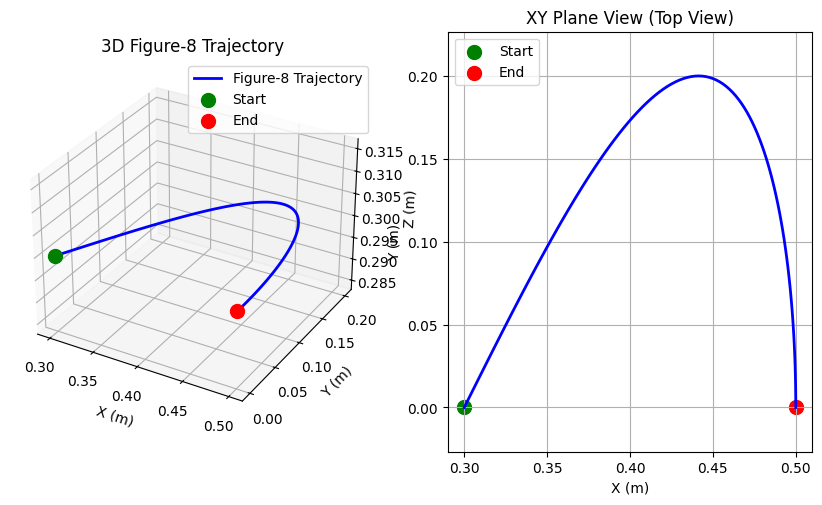

In [1]:
# Create an ideal path for comparison with the implemented trajectory 
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.abspath('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws/src/franka_mujoco_controller/franka_mujoco_controller')
sys.path.append(path)

from TrajectoryGenerator import TrajectoryGenerator

# Create instance without ROS2 (just for using the trajectory function)
traj_gen = TrajectoryGenerator.__new__(TrajectoryGenerator)  # Create without calling __init__

# Generate trajectory data
time_points = np.arange(0, 10.1, 0.1)  # 0 to 10 seconds, 0.1s intervals
positions = []

for t in time_points:
    pos = traj_gen.generate_figure8_trajectory(t)
    positions.append(pos)

positions = np.array(positions)

# Extract X, Y, Z coordinates
x_coords = positions[:, 0]
y_coords = positions[:, 1] 
z_coords = positions[:, 2]

# Create comprehensive plots
fig = plt.figure(figsize=(16, 12))

## 3D Trajectory Plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d') ## 2 * 3 grid, first subplot is 3D
ax1.plot(x_coords, y_coords, z_coords, 'b-', linewidth=2, label='Figure-8 Trajectory')
ax1.scatter(x_coords[0], y_coords[0], z_coords[0], color='green', s=100, label='Start')
ax1.scatter(x_coords[-1], y_coords[-1], z_coords[-1], color='red', s=100, label='End')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.set_title('3D Figure-8 Trajectory')
ax1.legend()
ax1.grid(True)

# XY Plane View (Top view)
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(x_coords, y_coords, 'b-', linewidth=2)
ax2.scatter(x_coords[0], y_coords[0], color='green', s=100, label='Start')
ax2.scatter(x_coords[-1], y_coords[-1], color='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View (Top View)')
ax2.grid(True)
ax2.axis('equal')
ax2.legend()

# Save trajectory data for later comparison
trajectory_data = {
    'time': time_points,
    'positions': positions,
}

/tmp/ipykernel_357318/1254588415.py:16: DeprecationWarning: Global serialization/deserialization functions have been replaced with
explicit typestores.

If you are deserializing messages from an AnyReader instance, simply
use its `.deserialize(data, typename)` method.

Otherwise instantiate a type store and use its methods:

from rosbags.typesys import Stores, get_typestore

typestore = get_typestore(Stores.ROS2_FOXY)
typestore.deserialize_cdr(data, typename)
  msg = deserialize_cdr(rawdata, connection.msgtype)


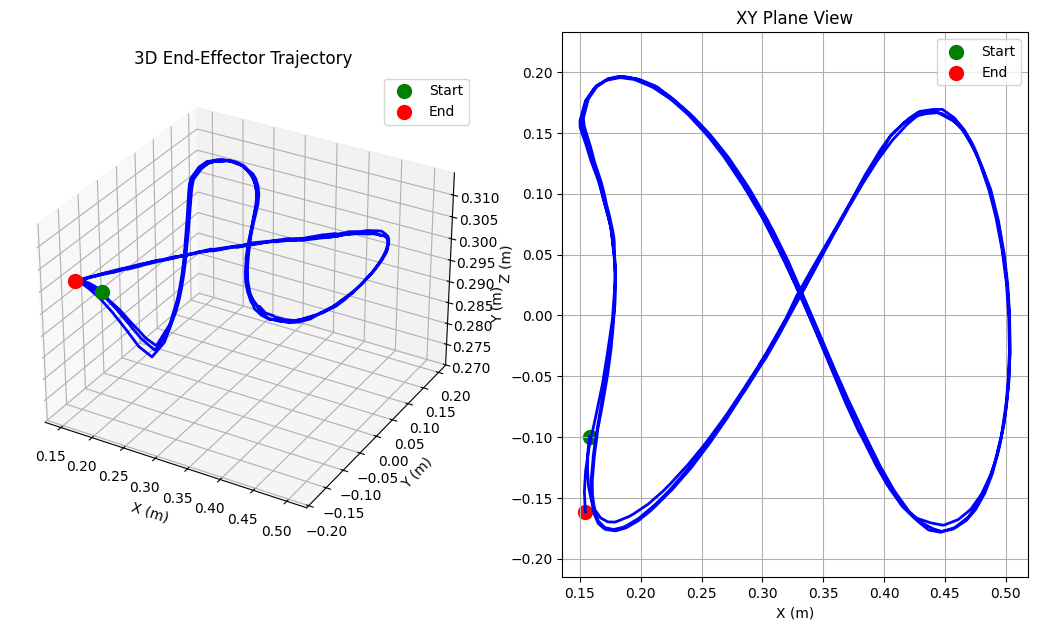

In [2]:
# Trajectory data for local robot
import os
import numpy as np
import matplotlib.pyplot as plt
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr

os.chdir('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws')
bag_path = "trajectory_data_nodelay"  # Path to the recorded bag file

poses = []

with Reader(bag_path) as reader:
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/local_robot/ee_pose':
            msg = deserialize_cdr(rawdata, connection.msgtype)
            
            # Extract pose data
            poses.append([
                msg.pose.position.x,
                msg.pose.position.y,
                msg.pose.position.z,
                timestamp * 1e-9 
            ])

poses = np.array(poses)


# Normalize time to start from 0
poses[:, 3] = poses[:, 3] - poses[0, 3]

fig = plt.figure(figsize=(16, 12))

# 3D trajectory
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(poses[:, 0], poses[:, 1], poses[:, 2], 'b-', linewidth=2)
ax1.scatter(poses[0, 0], poses[0, 1], poses[0, 2], c='green', s=100, label='Start')
ax1.scatter(poses[-1, 0], poses[-1, 1], poses[-1, 2], c='red', s=100, label='End')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.legend()
ax1.set_title('3D End-Effector Trajectory')

# XY plane view
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(poses[:, 0], poses[:, 1], 'b-', linewidth=2)
ax2.scatter(poses[0, 0], poses[0, 1], c='green', s=100, label='Start')
ax2.scatter(poses[-1, 0], poses[-1, 1], c='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

# Workspace bounds
x_range = [np.min(poses[:, 0]), np.max(poses[:, 0])]
y_range = [np.min(poses[:, 1]), np.max(poses[:, 1])]
z_range = [np.min(poses[:, 2]), np.max(poses[:, 2])]

plt.tight_layout()
plt.savefig('trajectory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_357318/1640192537.py:16: DeprecationWarning: Global serialization/deserialization functions have been replaced with
explicit typestores.

If you are deserializing messages from an AnyReader instance, simply
use its `.deserialize(data, typename)` method.

Otherwise instantiate a type store and use its methods:

from rosbags.typesys import Stores, get_typestore

typestore = get_typestore(Stores.ROS2_FOXY)
typestore.deserialize_cdr(data, typename)
  msg = deserialize_cdr(rawdata, connection.msgtype)


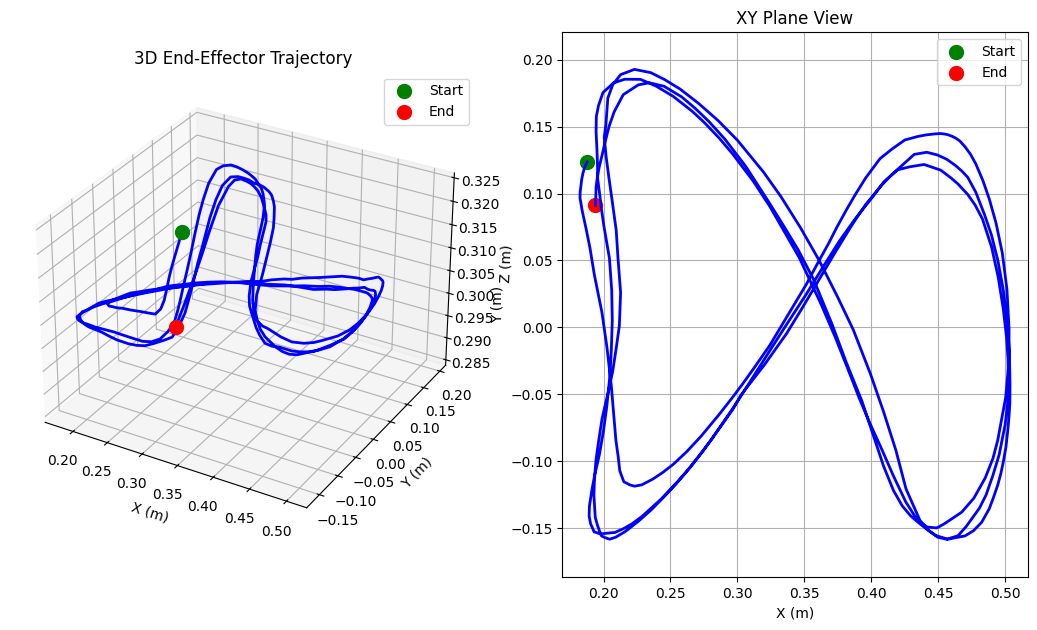

In [3]:
# Trajectory data for local robot
import os
import numpy as np
import matplotlib.pyplot as plt
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr

os.chdir('/media/kai/Kai_Backup/Master_Study/Master_Thesis/Master_Study_Master_Thesis/fr3_mujoco_ws')
bag_path = "trajectory_data_nodelay"  # Path to the recorded bag file

poses = []

with Reader(bag_path) as reader:
    for connection, timestamp, rawdata in reader.messages():
        if connection.topic == '/remote_robot/ee_pose':
            msg = deserialize_cdr(rawdata, connection.msgtype)
            
            # Extract pose data
            poses.append([
                msg.pose.position.x,
                msg.pose.position.y,
                msg.pose.position.z,
                timestamp * 1e-9 
            ])

poses = np.array(poses)


# Normalize time to start from 0
poses[:, 3] = poses[:, 3] - poses[0, 3]

fig = plt.figure(figsize=(16, 12))

# 3D trajectory
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax1.plot(poses[:, 0], poses[:, 1], poses[:, 2], 'b-', linewidth=2)
ax1.scatter(poses[0, 0], poses[0, 1], poses[0, 2], c='green', s=100, label='Start')
ax1.scatter(poses[-1, 0], poses[-1, 1], poses[-1, 2], c='red', s=100, label='End')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_zlabel('Z (m)')
ax1.legend()
ax1.set_title('3D End-Effector Trajectory')

# XY plane view
ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(poses[:, 0], poses[:, 1], 'b-', linewidth=2)
ax2.scatter(poses[0, 0], poses[0, 1], c='green', s=100, label='Start')
ax2.scatter(poses[-1, 0], poses[-1, 1], c='red', s=100, label='End')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Y (m)')
ax2.set_title('XY Plane View')
ax2.legend()
ax2.grid(True)
ax2.axis('equal')

# Workspace bounds
x_range = [np.min(poses[:, 0]), np.max(poses[:, 0])]
y_range = [np.min(poses[:, 1]), np.max(poses[:, 1])]
z_range = [np.min(poses[:, 2]), np.max(poses[:, 2])]

plt.tight_layout()
plt.savefig('trajectory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()